# Gradient descent

Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks. It trains machine learning models by minimizing errors between predicted and actual results.

**It is a first-order iterative algorithm for finding a local minimum of a differentiable multivariate function.**

The equation below describes what the gradient descent algorithm does: 
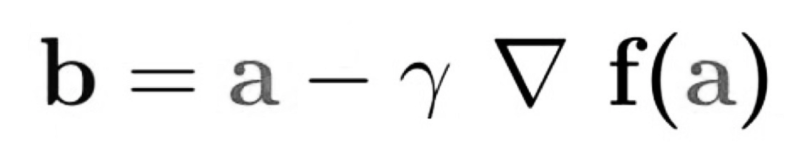

* b is the next position of our climber, while a represents his current position. 
* The minus sign refers to the minimization part of the gradient descent algorithm. 
* The gamma in the middle is a waiting factor.
* Gradient term ( Δf(a) ) is simply the direction of the steepest descent.



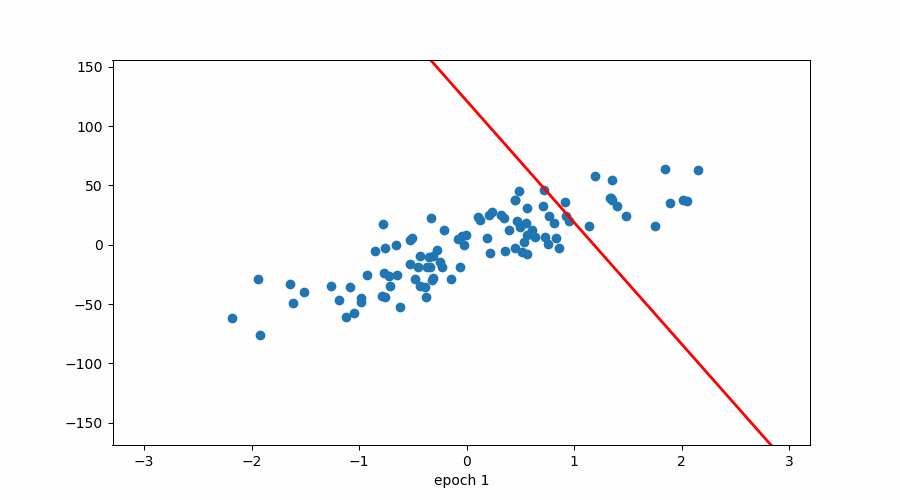

The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent. It is particularly useful in machine learning for minimizing the cost or loss function.

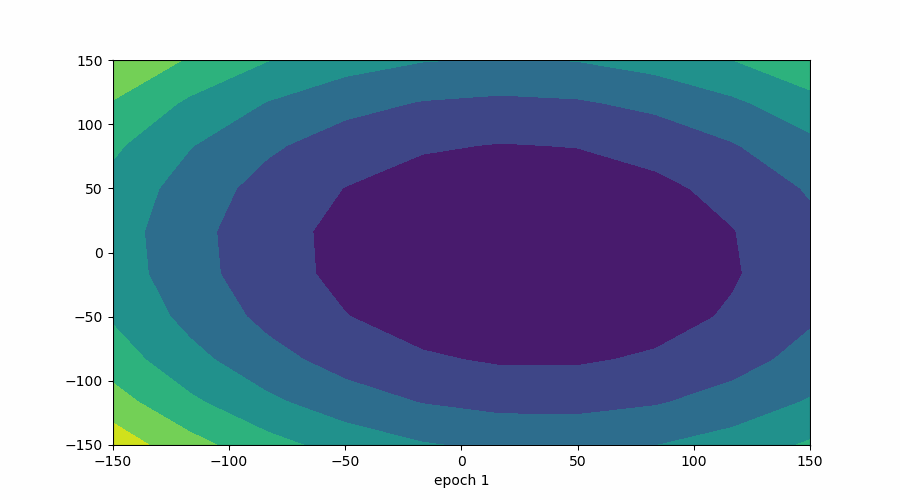

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

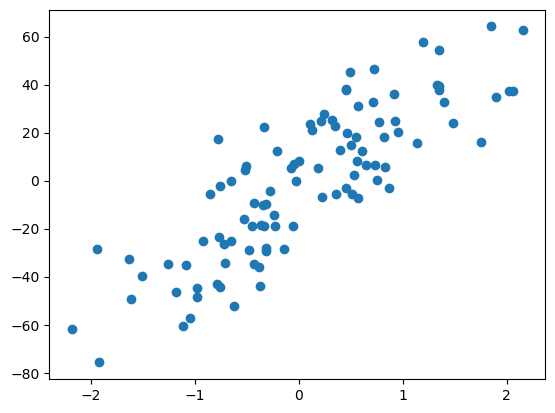

In [3]:
plt.scatter(X,y)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


In [41]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

## GD Regressor code from scratch

In [42]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [43]:
gd = GDRegressor(0.001,50)
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [44]:
y_pred_gd = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_gd)

0.6343842836315579

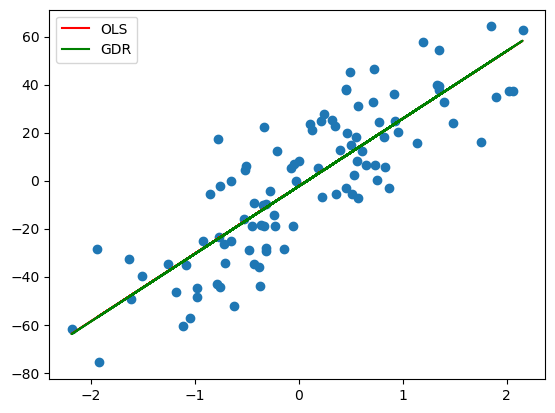

In [45]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,gd.predict(X),color='green',label='GDR')
plt.legend()
plt.show()

### The Ordinary Least Square and GD Regressor best fitting lines are overlapping each other.